In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [387]:
df=pd.read_csv('df11.csv',low_memory=False)
df.lead_time=df.lead_time.apply(lambda x : x.split(" ")[0])
df.lead_time=df.lead_time.astype('int64')

In [388]:
#Filters function to get data according to mandatory choices
def filters (df,mand):
    for x in mand:
        df1=df[df[x]== mand[x]]
    for x in mand:
        df1=df1[df1[x]== mand[x]]
    if  (len(df1['PN'])<=10) and (len(df1['PN'])>1):
         print(prin('31;1;4')+'Output-Remark:'+prin(0)+'Outputted Data-Frame has only {} rows, Thus, to analyze their families data, PLs or suppliers, '.format(len(df1['PN']))+prin('31;1;4')+'Please, Reserve'+prin(0)+' data analysis ticket')
    elif len(df1['PN']) == 0 :
        print(prin('31;1;4')+'OOPs:'+prin(0)+'No data based on your search criteria, Please respecify filters ranges')
    elif len(df1['PN']) == 1 :
        print(prin('31;1;4')+'Output-Remark:'+prin(0)+'Outputted Data-Frame has only "one" row')
    else:
        print(prin('31;1;4')+'Your-Output:'+prin(0)+' {} '.format(df1.shape))
    return df1

In [389]:
#Function for concatenating each output dataframe to get total data together, recording best part metric for each search criteri
def best_concat_group (df11,interest):
    best={}
    for _ in interest :
        if df11[_].dtype == "int64":
            if (_ == 'price') or (_ == 'lead_time'):
                best[_]=df11[_].min()
            else:
                best[_]=df11[_].max()
        else:
            pass
    return best

In [390]:
#Function to draw quantitive data according to Univariate histogram
def quan_uni (df,x):
    u=(df[x].max()-df[x].min())/10
    bins=np.arange(df[x].min(),df[x].max()+u,u)
    sb.histplot(data=df,x=x,color='grey',bins=bins);
    plt.axvline(int(np.percentile(df[x],17, interpolation = 'midpoint')),color='b');
    plt.axvline(int(np.percentile(df[x],83, interpolation = 'midpoint')),color='b');
    plt.title('Distribution of {} variable'.format(x),size=20);
    plt.xlabel('{}'.format(x),size=15);
    plt.ylabel('Count',size=15);
    plt.tight_layout()
    plt.xticks(np.round(bins));
    plt.tight_layout();
    plt.show();

In [391]:
#Function to draw categorical data according to Univariate bar plot
def categ_uni (df,x):
    if x != 'life_cycle':
        order=df[x].value_counts().index
        sb.countplot(data=df,x=x,color=sb.color_palette()[0],order=order);
        for s in range(len(df[x].unique())):
            plt.text(s,df[x].value_counts()[s]-10,df[x].value_counts()[s],va='center',ha='center');
    else :
        sb.countplot(data=df,x=x,color=sb.color_palette()[0],order=['Active','NRND','LTB','Obsolete']);
    plt.title('bar-plot for Market share over {} '.format(x),size=20);
    plt.xlabel('{}'.format(x),size=15);
    plt.ylabel('Count',size=15);
    plt.tight_layout();
    plt.show();

In [392]:
#Last insight that often could be missed
def missed (dff):
    r=[]
    dff1=dff.groupby(['supplier'])['option'].unique().reset_index(name='options')
    for e in dff1.options :
        r.append(len(e))
    dff1['no_of_options']=r
    print(prin('31;1;4') + 'Overall Observation:\n'+ prin(0)+'For all your search scenarios, you have " {} " option within each of " {} " suppliers, which can help for better pargain, \n   to know, what are these suppliers, How far each from best option within each feature of interest, Which supplier guarantees better options for all your features of interest and more, like probability of change to assure higher design sustainability or supplier that usually offers higher price deduction and more , \n \n please, '.format(dff1["no_of_options"].max(),len(dff1[dff1["no_of_options"] == dff1["no_of_options"].max()]))+ prin('31;1;4')+'reserve'+ prin(0)+ ' data analysis ticket')
    return 

In [393]:
#Function to draw Supplier VS quantitive variable according to bivariate box-plot, line-plot
def supp_quan_bi (df,y):
    if y == "expected_LC_range":
        df[y]=df[y].astype('int64')
    plt.subplot(1,2,1);
    order=df.groupby(['supplier'])[y].median().sort_values(ascending=False).index
    sb.boxplot(data=df,x='supplier',y=y,order=order,color=sb.color_palette()[0]);
    plt.title('Box-Plot {} distribution VS supplier'.format(y),size=20);
    plt.xlabel('supplier',size=15);
    plt.ylabel(y,size=15);  
    plt.subplot(1,2,2);
    order1=df.groupby(['supplier'])[y].mean().sort_values(ascending=False).index
    sb.pointplot(data=df,x='supplier',y=y,order=order1,color=sb.color_palette()[0],linestyles='--',ci=None);
    plt.title('Line & Point Plot Avg-{} VS supplier'.format(y),size=20);
    plt.xlabel('supplier',size=15);
    plt.ylabel(y,size=15);
    plt.tight_layout();
    plt.show();

In [394]:
#Function to draw Supplier VS quantitive variable according to bivariate violin-plot, line-plot
def lc_quan_bi (df,y):
    if y == "expected_LC_range":
        df[y]=df[y].astype('int64')
    plt.subplot(1,2,1);
    order=['Active','NRND','LTB','Obsolete']
    sb.violinplot(data=df,x='life_cycle',y=y,order=order,color=sb.color_palette()[0],inner='quartile');
    plt.title('Violin-Plot {} distribution VS life_cycle'.format(y),size=20);
    plt.xlabel('life_cycle',size=15);
    plt.ylabel(y,size=15);
    plt.subplot(1,2,2);
    sb.pointplot(data=df,x='life_cycle',order=order,y=y,linestyles='--',ci=None);
    plt.title('Line & Point Plot Avg-{} VS life_cycle'.format(y),size=20);
    plt.xlabel('life_cycle',size=15);
    plt.ylabel(y,size=15);    
    plt.tight_layout();
    plt.show();

In [395]:
#Function to draw expected_LC_range VS quantitive variable according to bivariate scatter-plot
def lc_range_quan_bi (df,y):
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    sb.regplot(data=df,x='expected_LC_range',y=y,color=sb.color_palette()[0],fit_reg=True,x_jitter=.3,scatter_kws={'alpha':1/3});
    plt.title('Scatter-Plot {} distribution VS expected_LC_range'.format(y),size=20);
    plt.xlabel('expected_LC_range',size=15);
    plt.ylabel(y,size=15);
    u=(df[y].max()-df[y].min())/10
    ticks=np.arange(df[y].min(),df[y].max()+u,u)
    plt.yticks(np.round(ticks));
    plt.tight_layout();
    plt.show();

In [396]:
#Function to draw supplier VS expected_LC_range VS quantitive variable according to multivariate scatter-plot
def supp_range_quan_multi (df,x):
    g=sb.FacetGrid(data=df,hue='supplier',height=7,palette='colorblind');
    g.map(sb.regplot,x,'expected_LC_range',fit_reg=False,y_jitter=.3);
    g.add_legend();
    plt.title("Scatter-plot expected_LC_range  VS  {} as output of supplier".format(x),size=15);
    plt.xlabel('{}'.format(x),size=12);
    plt.ylabel('expected_LC_range',size=12);
    plt.tight_layout();
    plt.show();

In [397]:
#Function to draw supplier VS life_cycle VS quantitive variable according to multivariate heatmap plot
def supp_lc_quan_multi (df,x):
    plt.figure(figsize=[18,8]);
    dr=df.groupby(['supplier','life_cycle'])[x].mean()
    dr=dr.reset_index(name='Avg_{}'.format(x))
    dr=pd.pivot(data=dr,columns='supplier',index='life_cycle',values='Avg_{}'.format(x))
    sb.heatmap(dr,annot=True,fmt='0.1f',cbar_kws={'label': x},cmap = 'vlag_r', center = 0);
    plt.title("Heatmap  supplier  VS  life_cycle  Having  AVG-{}".format(x),size=20);
    plt.xlabel('supplier',size=15);
    plt.ylabel('life_cycle',size=15);
    plt.tight_layout();
    plt.show();

In [398]:
#Function to draw supplier VS life_cycle VS quantitive variable according to multivariate heatmap plot
def cat_quan_quan_multi (df,z,x,y):
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    u1=(df[x].max()-df[x].min())/5
    xbin_edges = np.arange(int(df[x].min()), int(df[x].max()+u1), int(u1))
    xbin_idxs = pd.cut(df[x], xbin_edges, right = False,include_lowest = True, labels = False)
    df[x]=xbin_idxs
    dr=df.groupby([z,x])[y].mean()
    dr=dr.reset_index(name='Avg_{}'.format(y))
    dr=pd.pivot(data=dr,columns=z,index=x,values='Avg_{}'.format(y))
    sb.heatmap(dr,annot=True,fmt='0.1f',cbar_kws={'label': y},cmap = 'vlag_r', center = 0);
    plt.title("Heatmap  {}  VS  {}  Having  AVG-{}".format(z,x,y),size=20);
    plt.xlabel(' {} '.format(z),size=15);
    plt.ylabel(' {} '.format(x),size=15);
    plt.tight_layout();
    plt.show();
    return

In [399]:
#Function to draw expected_LC_range VS quantitive variable as output of life_cycle according to multivariate scatter-plot
def range_lc_quan_multi (df,x):
    if x == "expected_LC_range":
        df[x]=df[x].astype('int64')
    g=sb.FacetGrid(data=df,hue='life_cycle',height=7,palette='colorblind',legend_out=False);
    g.map(sb.regplot,x,'expected_LC_range',fit_reg=False,y_jitter=.3);
    g.add_legend();
    g.despine(left=True);
    plt.title("Scatter-plot expected_LC_range  VS  {} as output of life_cycle".format(x),size=15);
    plt.xlabel('{}'.format(x),size=12);
    plt.ylabel('expected_LC_range',size=12);
    plt.tight_layout();
    plt.show();    

In [400]:
#Visualizig main insights for concatenated data
def supp_LC_visual_1 (df):
    plt.figure(figsize=[16,5]);
    sb.countplot(data=df,x='supplier',hue='life_cycle',palette='Blues');
    plt.title("bar-plot of  Supplier  &  life_cycle",size=20);
    plt.ylabel('count',size=15);
    plt.xlabel('Supplier',size=15);
    plt.tight_layout();
    plt.legend();
    plt.show();
    print('\n')

In [401]:
#Comments, observations, print function
def prin(code):
    return f'\033[{code}m'

In [402]:
#Function to return best options for each mandatory choice and concatenate output data from each mandatory choice to analyze them all laterally 
def concat_best (df,mand):
    dff=pd.DataFrame()
    i=1
    for c in mand:
        df1=filters(df,mand[c])
        best[i]=best_concat_group(df1,interest)
        i+=1
        df1['option']=i
        dff=pd.concat([dff,df1],ignore_index=True)
    return dff,best

In [403]:
#Function of getting best five options for each numeric variable.
def best_5 (df,x):
    if x == 'expected_LC_range':
                df[x]=df[x].astype('int64')
    if df[x].dtype == "int64":
        if x in ['price','lead_time']:
            best_5=df.sort_values([x],ascending=False)
            best_5=best_5[-5:][['PN',x]]
            best_5=best_5.sort_values([x],ascending=False)
            sb.barplot(data=best_5,x='PN',y=x,color='orange',order=best_5.PN);
            for s in np.arange(len(best_5)):
                 plt.text(s,best_5[x].iloc[s]-3,best_5[x].iloc[s],va='center',ha='center');        
        else :
            best_5=df.sort_values([x],ascending=True)
            best_5=best_5[-5:][['PN',x]]
            best_5=best_5.sort_values([x],ascending=False)
            sb.barplot(data=best_5,x='PN',y=x,color='orange',order=best_5.PN);
            for s in np.arange(len(best_5)):
                 plt.text(s,best_5[x].iloc[s]-1,best_5[x].iloc[s],va='center',ha='center');           
        plt.yticks([]);
        plt.xlabel('Part-Name',size=15);
        plt.xlabel(x,size=15);
        plt.title('Best five offered parts regarding " {} " '.format(x),size=20);
        plt.tight_layout();
        plt.show();
    else:
        pass
    return best_5

In [404]:
#function for univariates full plot
def univariates (df,x):
    if x == "expected_LC_range":
        print(prin('31;1;4') + '\n Question:' + prin(0) + ' How "{}" offered aggregates as output of your search criteria  ?! \n     - What are best 5 options regarding {}'.format(x,x))
        df[x]=df[x].astype('str')
        categ_uni (df,x)
    elif df[x].dtype == "int64":
        print(prin('31;1;4') + '\n Question:' + prin(0) + ' How is the distribution of your quantitave variable of interest {} \n      - What are best 5 options regarding {} \n'.format(x,x))
        quan_uni (df,x)
    else:
        print(prin('31;1;4') + '\n Question:' + prin(0) + ' Are there specific types that dominates market share according to your feature of interest "{}" ?! \n'.format(x))
        categ_uni (df,x)
        return

In [405]:
#function for univariates full plot
def univariates_compl (df,x):
    if x == "expected_LC_range":
        dff=best_5(df,x)
        df[x]=df[x].astype('str')
        highest=df[x].value_counts().reset_index(name='count')['index'][0]
        best=dff[x].max()
        df_best=dff[dff[x]==dff[x].max()]
        print(prin('31;1;4') + 'Observation:' + prin(0) +' Looks " {} " has highest aggregation of " {} " parts recording " {} " years \n     - Also, we have got best option of " {} " years with full data as follows: \n \n {} \n ------------------------------ \n'.format(x,df[x].value_counts()[0],highest,str(best),df_best))
    elif df[x].dtype == "int64":
        dff=best_5(df,x)
        best=dff[x].min()
        df_best=dff[dff[x]==best]
        print(prin('31;1;4') + 'Observation:' + prin(0) +' From histogram, looks "66% or 2/3 " of {} data lies between {} and {}  \n     - Also, we have got best option of " {} " with full data as follows: \n \n {} \n ------------------------------ \n'.format(x,int(np.percentile(df[x],17)),int(np.percentile(df[x],83)),str(best),df_best))
    else:
        highest=df[x].value_counts().reset_index(name='count')['index'][0]
        print(prin('31;1;4') + 'Observation:' + prin(0) +' Looks " {} " has highest share of " {} " with record of " {} "  \n ------------------------------ \n'.format(highest,x,df[x].value_counts()[0]))
    return

In [406]:
#function to get best options regarding expected-LC-range and any numeric variable for scatter plot in bivariates
def best_options (df,x):
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    if df[x].dtype == "int64":
        if x in ['price','lead_time']:         
            de=int(np.percentile(df[x],20))
            dx=int(np.percentile(df[x],10))
            best_options_e=df[(df['expected_LC_range']==df['expected_LC_range'].max())&(df[x] <= de)][['PN','supplier','expected_LC_range',x]]
            dd=df[df[x] <= dx]
            best_options_x= dd[dd['expected_LC_range']==dd['expected_LC_range'].max()][['PN','supplier','expected_LC_range',x]]    
        else:          
            de=int(np.percentile(df[x],80))
            dx=int(np.percentile(df[x],90))
            best_options_e=df[(df['expected_LC_range']==df['expected_LC_range'].max())&(df[x] >= de)][['PN','supplier','expected_LC_range',x]]
            dd=df[df[x] >= dx]
            best_options_x= dd[dd['expected_LC_range']==dd['expected_LC_range'].max()][['PN','supplier','expected_LC_range',x]]    
    else:
        pass
    return best_options_e,best_options_x

In [407]:
def scatt_props(df,x,y):    
    plt.title(' Scatter-Plot between " {} " and " {} "'.format(x,y),size=20);
    plt.xlabel(x,size=15);
    plt.ylabel(y,size=15);
    plt.tight_layout();
    plt.show();
    x1=int(input('Enter your {} start limit '.format(x)))
    x2=int(input('Enter your {} end limit '.format(x)))
    y1=int(input('Enter your {} start limit '.format(y)))
    y2=int(input('Enter your {} end limit '.format(y)))
    df_filtered=df[(df[x] >= x1) & (df[x] <= x2) & (df[y] >= y1) & (df[y] <= y2)]
    print('Your output here :\n {} '.format(df_filtered[['PN','supplier',x,y]]))
    return       

In [408]:
def scatt (df,x,y):
    if df[x].dtype == 'int64':
        if df[y].dtype == 'int64':
            if (x != 'expected_LC_range') and (y != 'expected_LC_range'):
                sb.regplot(data=df,x=x,y=y,scatter_kws={'alpha':1/3});
                scatt_props(df,x,y)
            elif x == 'expected_LC_range' :
                sb.regplot(data=df,x=x,y=y,x_jitter=.3,scatter_kws={'alpha':1/3});
                scatt_props(df,x,y)
            elif y == 'expected_LC_range' :
                sb.regplot(data=df,x=x,y=y,y_jitter=.3,scatter_kws={'alpha':1/3});
                scatt_props(df,x,y)
        else :
            print('Please, enter numeric variables')
    else :
        print('Please, enter numeric variables')

In [409]:
#Function to draw all bivariates of any quantitive variable of interest against ('Supplier','life_cycle','expected-LC-range')
def bivariates (df,interest,mand) :
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    if 'supplier' not in mand:
        for _ in interest:
            if df[_].dtype == "int64":
                print(prin('31;1;4') + ' Question:' + prin(0) + ' How each supplier offered parts {} data distributed along as output of your mandatory criteria ? \n      - what is the avg {} offered by each supplier for outputted parts ?  \n'.format(_,_))
                supp_quan_bi (df,_);
                de=df.groupby(['supplier'])[_].mean().reset_index(name='mean').sort_values(['mean'],ascending=False)
                s=list(de['supplier'])
                de_max=s[0]
                de_min=s[-1]
                val_max=de['mean'].max()
                val_min=de['mean'].min()
                print(prin('31;1;4') + 'Observation:' + prin(0) +' From Line-Plot, looks, Supplier " {} " has max-avg-{} with record of " {} ", While Supplier " {} " has min-avg-{} with record of " {} " \n     - Also, from box-plot, is there any outliers within any supplier data that you could benefit from, regarding "{}" ! \n  \n ------------------------------ \n'.format(str(de_max),_,val_max,de_min,_,val_min,_))
            else:
                pass
    else:
        pass
    if 'life_cycle' not in mand:
        for _ in interest:
            if df[_].dtype == "int64":
                print(prin('31;1;4') + ' Question:' + prin(0) + ' How each life-cycle status offered parts {} data distributed along as output of your mandatory criteria ? \n      - what is the avg {} offered within each LC-status for outputted parts ?  \n'.format(_,_))
                lc_quan_bi (df,_);
                de=df.groupby(['life_cycle'])[_].mean().reset_index(name='mean').sort_values(['mean'],ascending=False)
                s=list(de['life_cycle'])
                de_max=s[0]
                de_min=s[-1]
                val_max=de['mean'].max()
                val_min=de['mean'].min()
                print(prin('31;1;4') + 'Observation:' + prin(0) +' From Line-Plot, looks," {} " status has max-avg-{} with record of " {} ", While " {} " status has min-avg-{} with record of " {} " \n     - Also, from box-plot, is there any outliers within specific LC-status data that you could benefit from, regarding "{}" ! \n  \n ------------------------------ \n'.format(str(de_max),_,val_max,de_min,_,val_min,_))
            else:
                pass
    else:
        pass
    '''
    if 'expected_LC_range' not in mand:
        for _ in interest:
            if df[_].dtype == "int64":
                if _ != 'expected_LC_range':
                    print(prin('31;1;4') + ' Question:' + prin(0) + ' How is the correlation between "expected-LC-range" and "{}" data outputted from your search ? \n      - what are best options that achieve best of both features in outputted parts ?  \n'.format(_))
                    lc_range_quan_bi (df,_);
                    be,bx=best_options(df,_)
                    print(prin('31;1;4') + 'Observation:' + prin(0) + ' From correlation reg-line, do we have to let one feature go to achieve the other or we can achieve them both ? \n     - Also, Best options according to both features of interest within best 10% of " {} " data and guaranteed best expect_LC_range as follows : \n {} \n'.format(_,bx))
                else:
                    pass
            else:
                pass
    
    else:
        pass
    '''
    return        

In [410]:
#Function to draw all bivariates of any quantitive variable of interest against ('Supplier','life_cycle','expected-LC-range')
def bivariates_2 (df,interest,mand) :
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    if 'supplier' not in mand:
        if ('supplier' == interest[0]) and (df[interest[1]].dtype == 'int64') :
            de=df.groupby(['supplier'])[interest[1]].mean().reset_index(name='mean').sort_values(['mean'],ascending=False)
            s=list(de['supplier'])
            de_max=s[0]
            de_min=s[-1]
            val_max=de['mean'].max()
            val_min=de['mean'].min()
            print(prin('31;1;4') + 'Observation:' + prin(0) +' From Line-Plot, looks, Supplier " {} " has max-avg-{} with record of " {} ", While Supplier " {} " has min-avg-{} with record of " {} " \n     - Also, from box-plot, is there any outliers within any supplier data that you could benefit from, regarding "{}" ! \n  \n ------------------------------ \n'.format(str(de_max),interest[1],val_max,de_min,interest[1],val_min,interest[1]))
        else:
            pass
    if 'life_cycle' not in mand:
        if ('life_cycle' == interest[0]) and (df[interest[1]].dtype == 'int64') :
            de=df.groupby(['life_cycle'])[interest[1]].mean().reset_index(name='mean').sort_values(['mean'],ascending=False)
            s=list(de['life_cycle'])
            de_max=s[0]
            de_min=s[-1]
            val_max=de['mean'].max()
            val_min=de['mean'].min()
            print(prin('31;1;4') + 'Observation:' + prin(0) +' From Line-Plot, looks," {} " status has max-avg-{} with record of " {} ", While " {} " status has min-avg-{} with record of " {} " \n     - Also, from box-plot, is there any outliers within specific LC-status data that you could benefit from, regarding "{}" ! \n  \n ------------------------------ \n'.format(str(de_max),interest[1],val_max,de_min,interest[1],val_min,interest[1]))
        else:
            pass
    else:
        pass
        return        

In [411]:
#Function to draw all bivariates of any quantitive variable of interest against ('Supplier','life_cycle','expected-LC-range')
def bivariates_1 (df,interest,mand) :
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    if 'supplier' not in mand:
        if ('supplier' == interest[0]) and (df[interest[1]].dtype == 'int64') :
            print(prin('31;1;4') + ' Question:' + prin(0) + ' How each supplier offered parts {} data distributed along as output of your mandatory criteria ? \n      - what is the avg {} offered by each supplier for outputted parts ?  \n'.format(interest[1],interest[1]))
            supp_quan_bi (df,interest[1]);
            bivariates_2(df,interest,mand)
        elif ('supplier' == interest[1]) and (df[interest[0]].dtype == 'int64') :
            print(prin('31;1;4') + ' Question:' + prin(0) + ' How each supplier offered parts {} data distributed along as output of your mandatory criteria ? \n      - what is the avg {} offered by each supplier for outputted parts ?  \n'.format(interest[0],interest[0]))
            supp_quan_bi (df,df,interest[1]);
            bivariates_2(df,interest,mand)
    if 'life_cycle' not in mand:
        if ('life_cycle' == interest[0]) and (df[interest[1]].dtype == 'int64') :
            print(prin('31;1;4') + ' Question:' + prin(0) + ' How each life-cycle status offered parts {} data distributed along as output of your mandatory criteria ? \n      - what is the avg {} offered within each LC-status for outputted parts ?  \n'.format(interest[1],interest[1]))
            supp_quan_bi (df,interest[1]);
            bivariates_2(df,interest,mand)
        elif ('life_cycle' == interest[1]) and (df[interest[0]].dtype == 'int64') :
            print(prin('31;1;4') + ' Question:' + prin(0) + ' How each life-cycle status offered parts {} data distributed along as output of your mandatory criteria ? \n      - what is the avg {} offered by each life-cycle status for outputted parts ?  \n'.format(interest[0],interest[0]))
            lc_quan_bi (df,interest[1]);
            bivariates_2(df,interest,mand)
    if (df[interest[0]].dtype == 'int64') and (df[interest[1]].dtype == 'int64') :
        scatt(df1,interest[0],interest[1])
        
    return        

In [412]:
def multi_heat_props(df,x,y):    
    exp=int(input('Enter expected_LC_range value please,'))
    x_start=int(input('Enter {} start please,'.format(x)))
    x_end=int(input('Enter {} end please,'.format(x)))
    y_start=int(input('Enter first {} limit please,'.format(y)))
    y_final=int(input('Enter final {} limit please,'.format(y)))
    needd=df[(df['expected_LC_range']==exp)&(df[x]> x_start)&(df[x]< x_end)&(df[y]> y_start)&(df[y]< y_final)][['supplier','PN',x,y,'expected_LC_range']]
    print(prin('31;1;4') + 'Observation:' + prin(0) + ' here are your parts of interest : \n \n {} \n \n ------------------------'.format(needd))
    return       

In [413]:
#Function to draw heatmap between three quantitive variables 
def numeric_heatmap(df,x,y,z):
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    u1=(df[x].max()-df[x].min())/10
    u2=(df[y].max()-df[y].min())/10
    xbin_edges = np.arange(int(df[x].min()), int(df[x].max()+u1), int(u1))
    ybin_edges = np.arange(int(df[y].min()), int(df[y].max()+u2),int(u2))
    # count number of points in each bin
    xbin_idxs = pd.cut(df[x], xbin_edges, right = False,include_lowest = True, labels = False)
    ybin_idxs = pd.cut(df[y], ybin_edges, right = False,include_lowest = True, labels = False)
    pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
    pts_per_bin = pts_per_bin.reset_index()
    pts_per_bin = pts_per_bin.pivot(index = x, columns = y).values
    z_wts = df[z] / pts_per_bin[xbin_idxs, ybin_idxs]
    # plot the data using the calculated weights
    plt.figure(figsize=[18,10]);
    plt.hist2d(data = df, x = x, y = y, weights = z_wts,bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
    plt.title('{}  VS  {}  Having Avg-{}'.format(x,y,z),size=20);
    plt.xticks(xbin_edges);
    plt.yticks(ybin_edges);
    plt.xlabel(x,size=15);
    plt.ylabel(y,size=15);
    plt.colorbar(label = 'mean-{}'.format(z));
    return

In [414]:
#Visualizig main insights for package VS supplier data
def supp_pack_visual_2 (df):
    plt.figure(figsize=[16,5]);
    sb.countplot(data=df,x='supplier',hue='packaging',palette='Greens');
    plt.title("bar-plot of  Supplier  &  packaging-options",size=20);
    plt.ylabel('count',size=15);
    plt.xlabel('Supplier',size=15);
    plt.tight_layout();
    plt.legend();
    plt.show();
    return

In [415]:
def multi_scat_props(df,x):    
    lif=input('Enter prefered life_cycle status please,')
    exp_start=int(input('Enter expected_LC_range start value please,'))
    exp_end=int(input('Enter expected_LC_range end value please,'))
    x_start=int(input('Enter {} start please,'.format(x)))
    x_end=int(input('Enter {} end please,'.format(x)))
    needd=df[(df['expected_LC_range']<=exp_end)&(df['expected_LC_range']>=exp_start)&(df[x]> x_start)&(df[x]< x_end)&(df['life_cycle'] == lif)][['supplier','PN',x,'life_cycle','expected_LC_range']]
    print(prin('31;1;4') + 'Observation:' + prin(0) + ' here are your parts of interest : \n \n {} \n \n ------------------------'.format(needd))
    return       

In [416]:
#function for multivariates full plot
def multivariates (df,interest) :
    df['expected_LC_range']=df['expected_LC_range'].astype('int64')
    if ['life_cycle','lead_time','supplier'] == interest:
        _ = 'lead_time'
        print(prin('31;1;4') + '\n Question:' + prin(0) + ' Here is a heatmap between three variables, may you check and just specify best portion that obey your need? \n')
        supp_lc_quan_multi (df,_)
        
    else: 
        pass
    if ['life_cycle','price','supplier'] == interest:
        _ = 'price'
        print(prin('31;1;4') + '\n Question:' + prin(0) + ' Here is a heatmap between three variables, may you check and just specify best portion that obey your need? \n')
        supp_lc_quan_multi (df,_)
        
    else: 
        pass
    if ['lead_time','expected_LC_range','price'] == interest:
        print(prin('31;1;4') + '\n Question:' + prin(0) + ' Here is a heatmap between three quantitative variables, may you check and just specify best portion that obey your need? \n')
        numeric_heatmap(df,'lead_time','price','expected_LC_range')    
        #multi_heat_props(df,'lead_time','price')
    if ['life_cycle','lead_time','expected_LC_range'] == interest :
        range_lc_quan_multi (df.sample(200,replace=False),'lead_time')
        #multi_scat_props(df,'lead_time')
    else: 
        pass
    if ['life_cycle','price','expected_LC_range'] == interest :
        range_lc_quan_multi (df.sample(200,replace=False),'price')
        #multi_scat_props(df,'price')
    else: 
        pass
    return

In [417]:
def heat_interact (df,_):
    supp=input('Enter supplier name please,')
    stat=input('Enter LC status please,')
    needed=df[(df['supplier']==supp)&(df['life_cycle']==stat)][['supplier','PN','life_cycle',_]]
    print(prin('31;1;4') + 'Observation:' + prin(0) + ' here are your parts of interest : \n \n {} \n \n ------------------------'.format(needed.sample(6)))
    return

# Start :
 > > At first set your mandatory features accordig to your criteria

In [418]:
cols=pd.read_csv('11.csv')
cols

Empty DataFrame
Columns: [Taxonomy, PN, supplier, packaging, current, resistance, voltage, Size, life_cycle, expected_LC_range, RoHs, Compliant, Exemption, price, Assembly_location, lead_time, inventory, distributor_location]
Index: []

In [419]:
#mandatory options
mand={'Taxonomy':'power supply','voltage':25}
print(prin('31;1;4') + 'Mandatory Choices \n' + prin(0) + ' {}'.format(mand))

Mandatory Choices 
 {'Taxonomy': 'power supply', 'voltage': 25}


In [420]:
#features of interest
interest=['supplier','expected_LC_range','lead_time','price','life_cycle']
print(prin('31;1;4') + 'Features of interest \n' + prin(0) + ' {}'.format(interest))

Features of interest 
 ['supplier', 'expected_LC_range', 'lead_time', 'price', 'life_cycle']


In [421]:
df1=filters (df,mand)

Your-Output: (994, 30) 


### To get output like next

In [422]:
result=pd.read_csv('results.csv')
for x in mand :
    result[x]=mand[x]
result

Taxonomy  PN  supplier  packaging  current  resistance  voltage  Size  \
0  power supply NaN       NaN        NaN      NaN         NaN       25   NaN   

   life_cycle  expected_LC_range  ...  price  Assembly_location  lead_time  \
0         NaN                NaN  ...    NaN                NaN        NaN   

   inventory  distributor_location  Output_status  Data  Univariates  \
0        NaN                   NaN   Your-Output:   URL         URL1   

  Bivariates Multivariates  
0       URL2          URL3  

[1 rows x 23 columns]

# Univariates  

In [423]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4
rcParams['font.size']=15


 Question: Are there specific types that dominates market share according to your feature of interest "supplier" ?! 



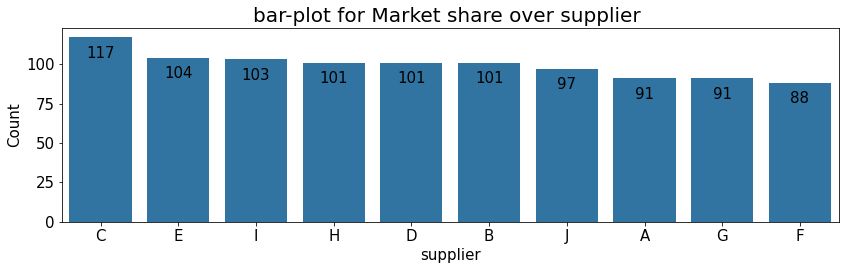

Observation: Looks " C " has highest share of " supplier " with record of " 117 "  
 ------------------------------ 



In [424]:
univariates (df1,'supplier')
univariates_compl (df1,'supplier')


 Question: Are there specific types that dominates market share according to your feature of interest "life_cycle" ?! 



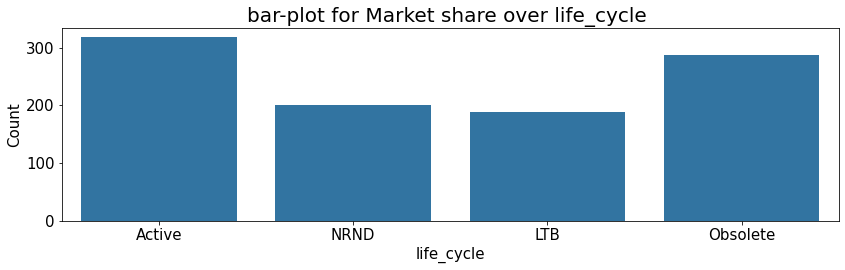

Observation: Looks " Active " has highest share of " life_cycle " with record of " 318 "  
 ------------------------------ 



In [425]:
univariates (df1,'life_cycle')
univariates_compl (df1,'life_cycle')


 Question: How "expected_LC_range" offered aggregates as output of your search criteria  ?! 
     - What are best 5 options regarding expected_LC_range


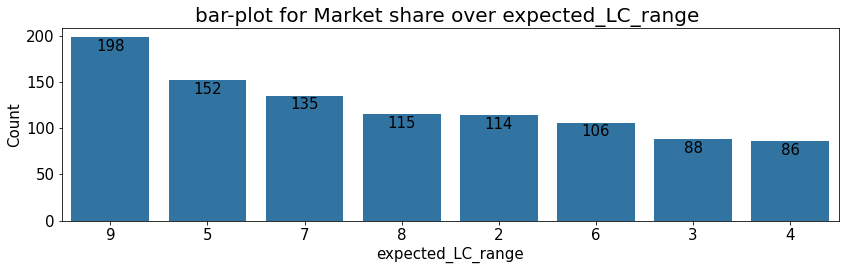

In [426]:
univariates (df1,'expected_LC_range')

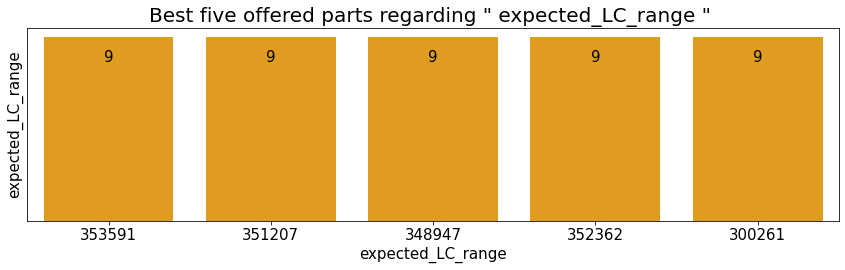

Observation: Looks " expected_LC_range " has highest aggregation of " 198 " parts recording " 9 " years 
     - Also, we have got best option of " 9 " years with full data as follows: 
 
             PN  expected_LC_range
741263  353591                  9
741033  351207                  9
740818  348947                  9
202629  352362                  9
3589    300261                  9 
 ------------------------------ 



In [427]:
univariates_compl(df1,'expected_LC_range')


 Question: How is the distribution of your quantitave variable of interest lead_time 
      - What are best 5 options regarding lead_time 



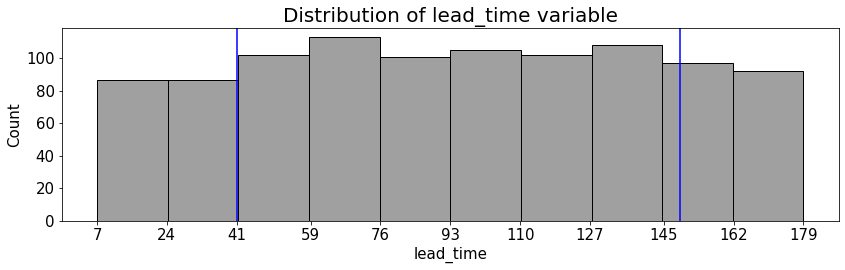

In [428]:
univariates (df1,'lead_time')

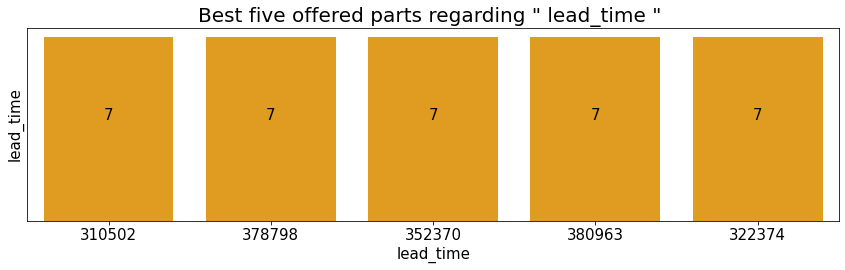

Observation: From histogram, looks "66% or 2/3 " of lead_time data lies between 41 and 149  
     - Also, we have got best option of " 7 " with full data as follows: 
 
             PN  lead_time
537156  310502          7
205760  378798          7
202631  352370          7
543575  380963          7
969397  322374          7 
 ------------------------------ 



In [429]:
univariates_compl (df1,'lead_time')


 Question: How is the distribution of your quantitave variable of interest price 
      - What are best 5 options regarding price 



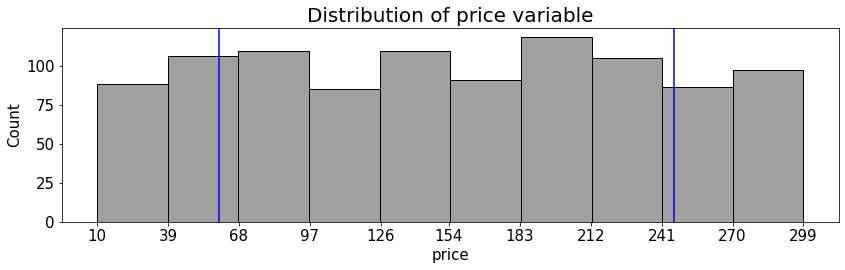

In [430]:
univariates (df1,'price')

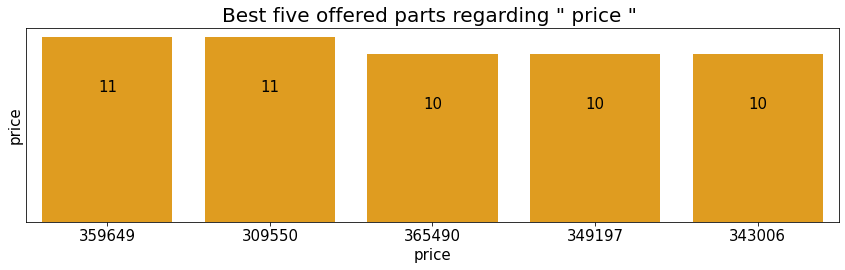

Observation: From histogram, looks "66% or 2/3 " of price data lies between 60 and 246  
     - Also, we have got best option of " 10 " with full data as follows: 
 
             PN  price
742306  365490     10
202236  349197     10
651964  343006     10 
 ------------------------------ 



In [431]:
univariates_compl (df1,'price')


 Question: Are there specific types that dominates market share according to your feature of interest "supplier" ?! 



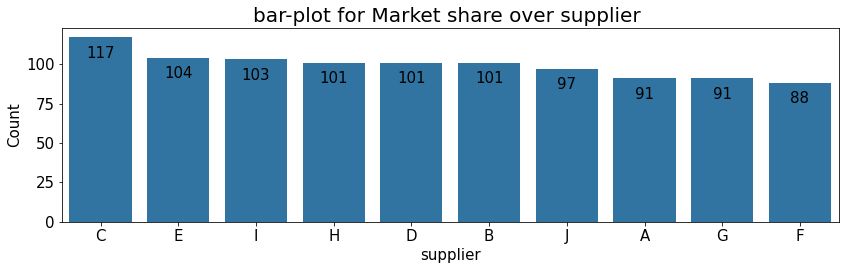

Observation: Looks " C " has highest share of " supplier " with record of " 117 "  
 ------------------------------ 


 Question: How "expected_LC_range" offered aggregates as output of your search criteria  ?! 
     - What are best 5 options regarding expected_LC_range


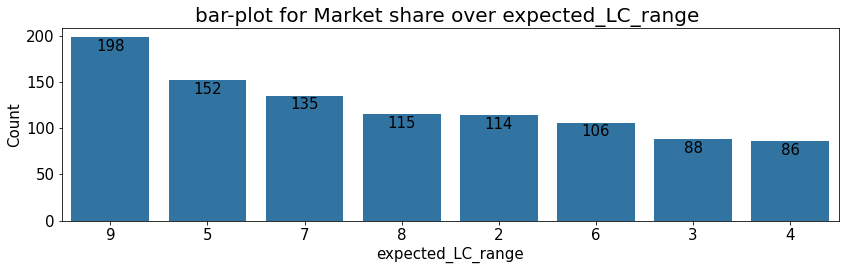

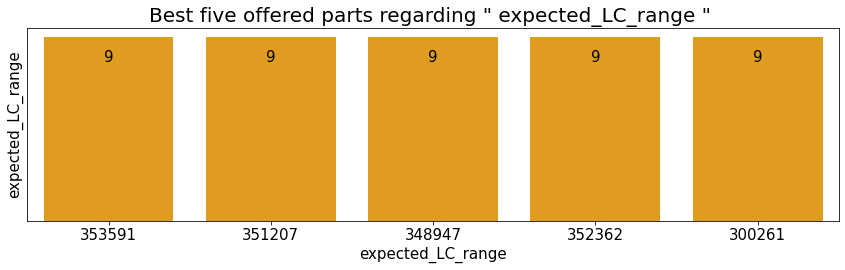

Observation: Looks " expected_LC_range " has highest aggregation of " 198 " parts recording " 9 " years 
     - Also, we have got best option of " 9 " years with full data as follows: 
 
             PN  expected_LC_range
741263  353591                  9
741033  351207                  9
740818  348947                  9
202629  352362                  9
3589    300261                  9 
 ------------------------------ 


 Question: How is the distribution of your quantitave variable of interest lead_time 
      - What are best 5 options regarding lead_time 



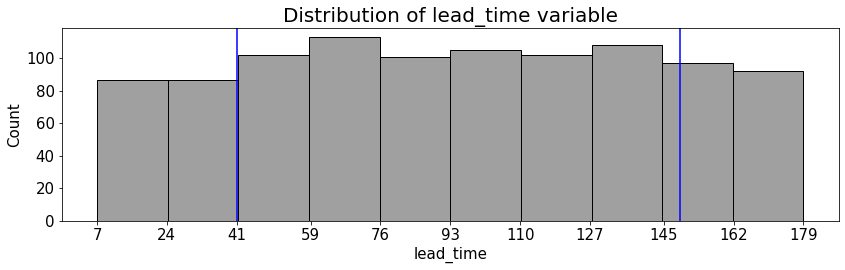

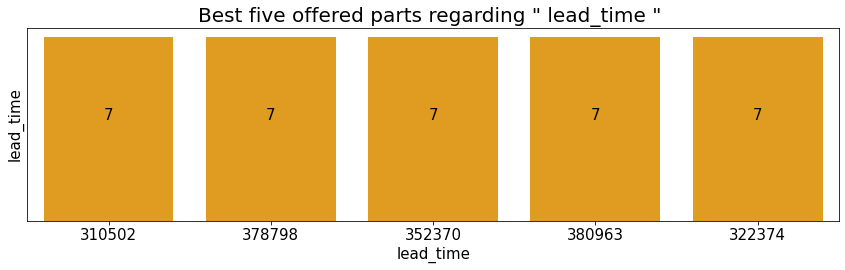

Observation: From histogram, looks "66% or 2/3 " of lead_time data lies between 41 and 149  
     - Also, we have got best option of " 7 " with full data as follows: 
 
             PN  lead_time
537156  310502          7
205760  378798          7
202631  352370          7
543575  380963          7
969397  322374          7 
 ------------------------------ 


 Question: How is the distribution of your quantitave variable of interest price 
      - What are best 5 options regarding price 



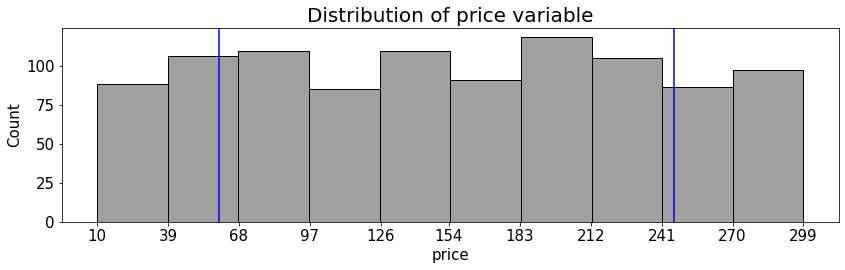

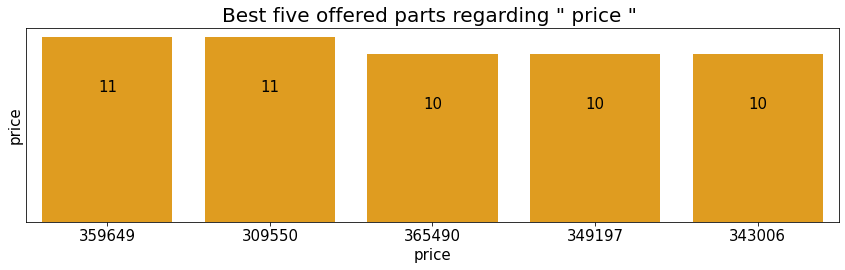

Observation: From histogram, looks "66% or 2/3 " of price data lies between 60 and 246  
     - Also, we have got best option of " 10 " with full data as follows: 
 
             PN  price
742306  365490     10
202236  349197     10
651964  343006     10 
 ------------------------------ 


 Question: Are there specific types that dominates market share according to your feature of interest "life_cycle" ?! 



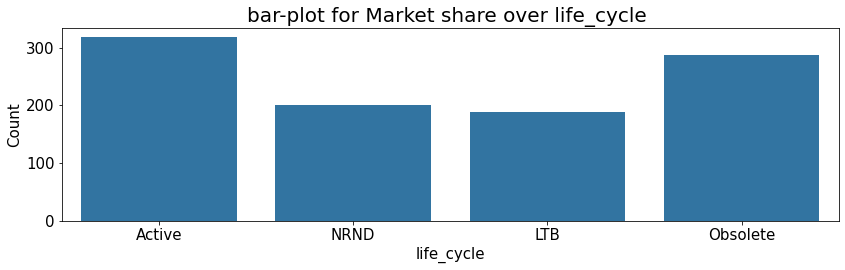

Observation: Looks " Active " has highest share of " life_cycle " with record of " 318 "  
 ------------------------------ 



In [432]:
for x in interest:
    univariates(df1,x)
    univariates_compl(df1,x)

# Bivariates  

### Please, specify required Bi-Relations to be analyzed.
> ['supplier','life_cycle']            "cat-cat" 

> ['supplier','lead_time']             "cat-quan"

> ['supplier','price']                 "cat-quan"

> ['supplier','expected_LC_range']     "cat-quan"

> ['life_cycle','expected_LC_range']   "cat-quan"

> ['life_cycle','lead_time']           "cat-quan"

> ['life_cycle','price']               "cat-quan"

> ['lead_time','expected_LC_range']    "quan-quan"

> ['price','expected_LC_range']        "quan-quan"

> ['lead_time','price']                "quan-quan"


In [433]:
rcParams['figure.figsize'] = 15,5

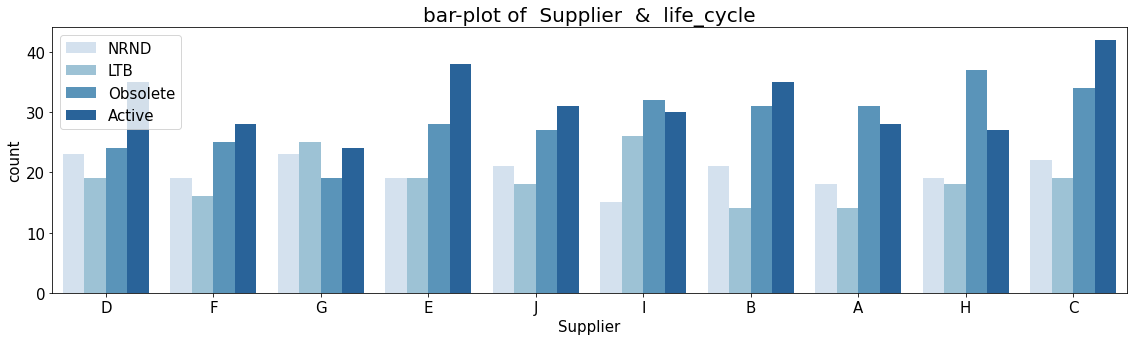

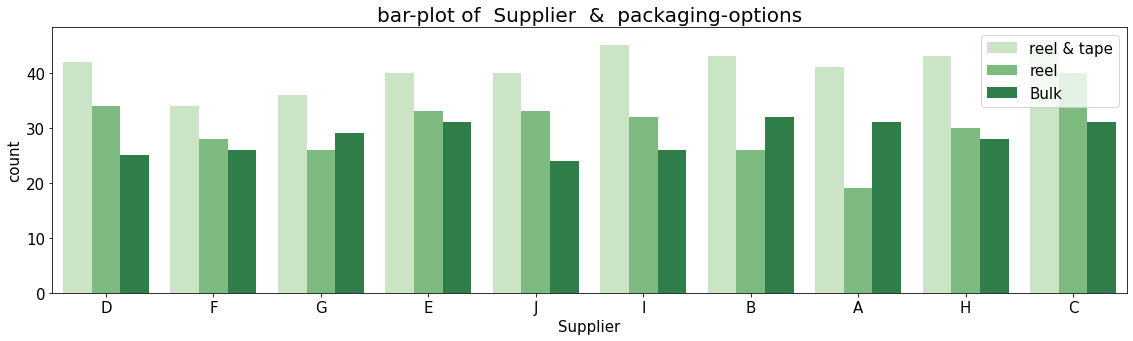

In [434]:
supp_LC_visual_1 (df1)
supp_pack_visual_2 (df1)

 Question: How each supplier offered parts lead_time data distributed along as output of your mandatory criteria ? 
      - what is the avg lead_time offered by each supplier for outputted parts ?  



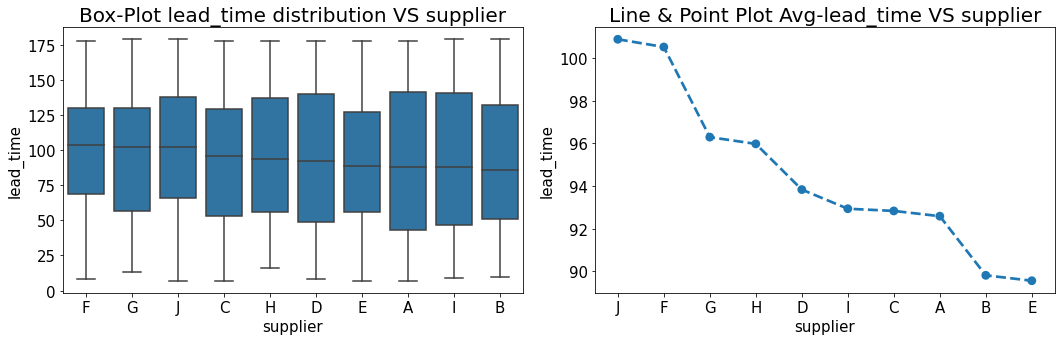

Observation: From Line-Plot, looks, Supplier " J " has max-avg-lead_time with record of " 100.89690721649484 ", While Supplier " E " has min-avg-lead_time with record of " 89.54807692307692 " 
     - Also, from box-plot, is there any outliers within any supplier data that you could benefit from, regarding "lead_time" ! 
  
 ------------------------------ 



In [435]:
bivariates_1 (df1,['supplier','lead_time'],mand)

 Question: How each supplier offered parts price data distributed along as output of your mandatory criteria ? 
      - what is the avg price offered by each supplier for outputted parts ?  



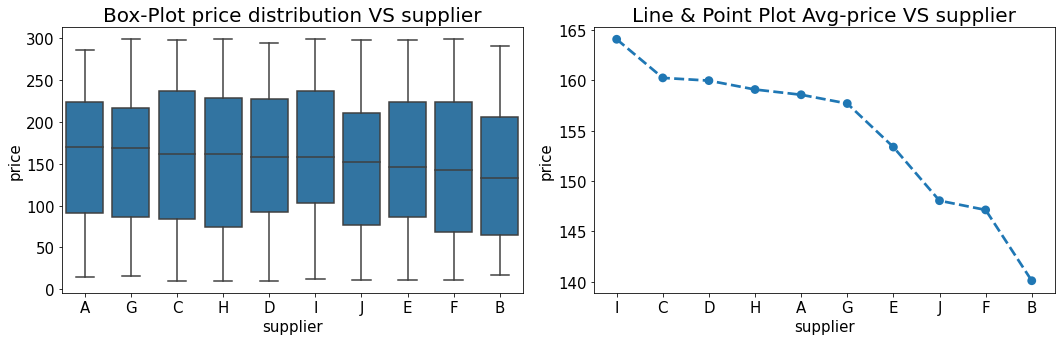

Observation: From Line-Plot, looks, Supplier " I " has max-avg-price with record of " 164.04854368932038 ", While Supplier " B " has min-avg-price with record of " 140.11881188118812 " 
     - Also, from box-plot, is there any outliers within any supplier data that you could benefit from, regarding "price" ! 
  
 ------------------------------ 



In [436]:
bivariates_1 (df1,['supplier','price'],mand)

 Question: How each supplier offered parts expected_LC_range data distributed along as output of your mandatory criteria ? 
      - what is the avg expected_LC_range offered by each supplier for outputted parts ?  



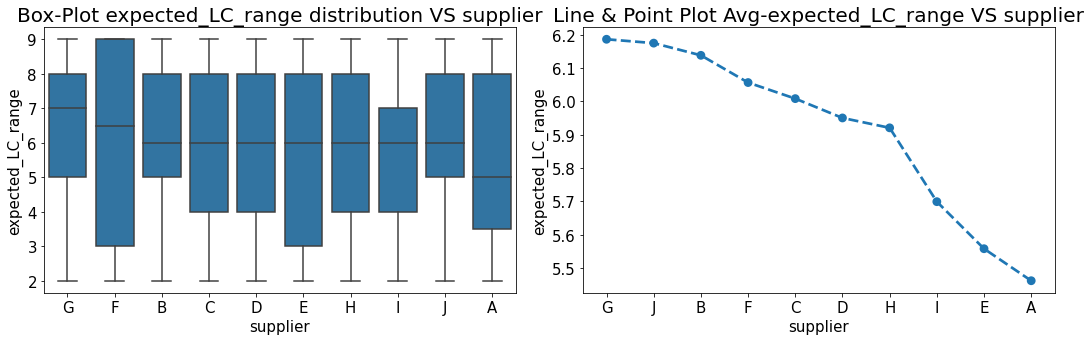

Observation: From Line-Plot, looks, Supplier " G " has max-avg-expected_LC_range with record of " 6.186813186813187 ", While Supplier " A " has min-avg-expected_LC_range with record of " 5.461538461538462 " 
     - Also, from box-plot, is there any outliers within any supplier data that you could benefit from, regarding "expected_LC_range" ! 
  
 ------------------------------ 



In [437]:
bivariates_1 (df1,['supplier','expected_LC_range'],mand)

 Question: How each life-cycle status offered parts expected_LC_range data distributed along as output of your mandatory criteria ? 
      - what is the avg expected_LC_range offered within each LC-status for outputted parts ?  



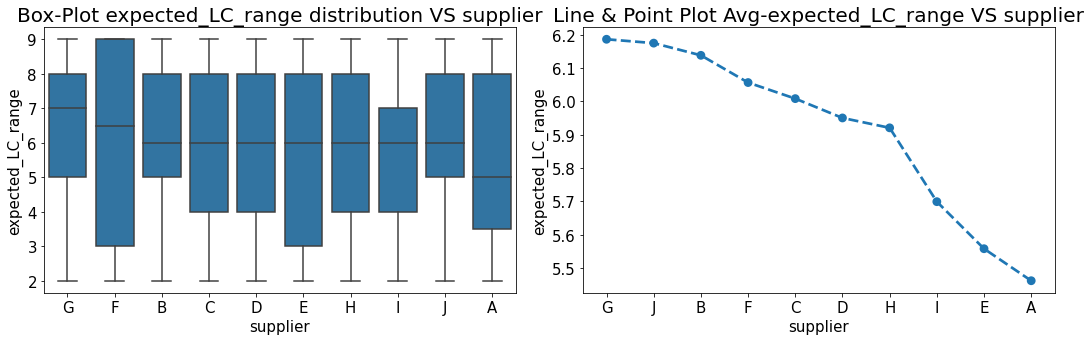

Observation: From Line-Plot, looks," Active " status has max-avg-expected_LC_range with record of " 5.9937106918239 ", While " Obsolete " status has min-avg-expected_LC_range with record of " 5.833333333333333 " 
     - Also, from box-plot, is there any outliers within specific LC-status data that you could benefit from, regarding "expected_LC_range" ! 
  
 ------------------------------ 



In [438]:
bivariates_1 (df1,['life_cycle','expected_LC_range'],mand)

 Question: How each life-cycle status offered parts lead_time data distributed along as output of your mandatory criteria ? 
      - what is the avg lead_time offered within each LC-status for outputted parts ?  



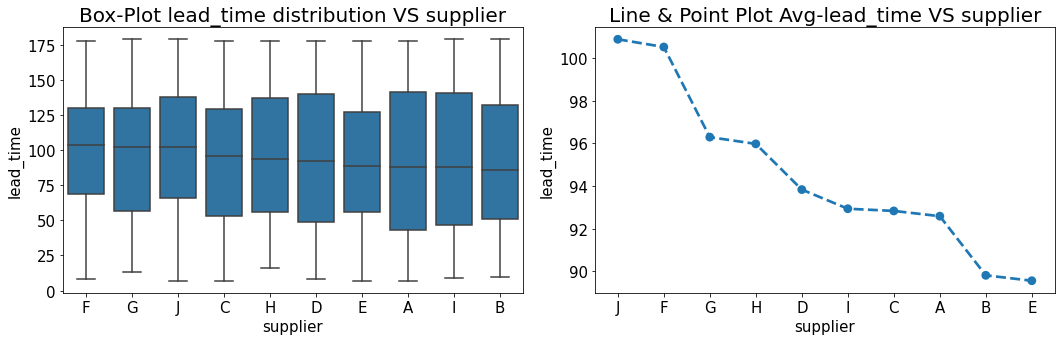

Observation: From Line-Plot, looks," NRND " status has max-avg-lead_time with record of " 95.9 ", While " LTB " status has min-avg-lead_time with record of " 90.95744680851064 " 
     - Also, from box-plot, is there any outliers within specific LC-status data that you could benefit from, regarding "lead_time" ! 
  
 ------------------------------ 



In [439]:
bivariates_1 (df1,['life_cycle','lead_time'],mand)

 Question: How each life-cycle status offered parts price data distributed along as output of your mandatory criteria ? 
      - what is the avg price offered within each LC-status for outputted parts ?  



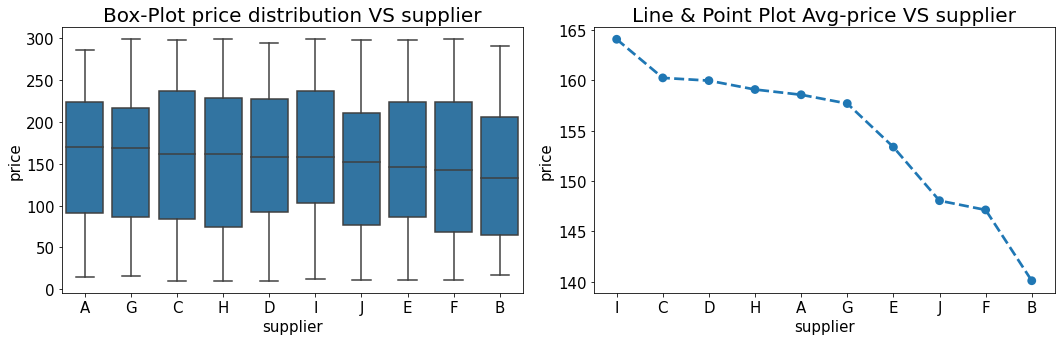

Observation: From Line-Plot, looks," LTB " status has max-avg-price with record of " 157.64361702127658 ", While " NRND " status has min-avg-price with record of " 149.89 " 
     - Also, from box-plot, is there any outliers within specific LC-status data that you could benefit from, regarding "price" ! 
  
 ------------------------------ 



In [440]:
bivariates_1 (df1,['life_cycle','price'],mand)

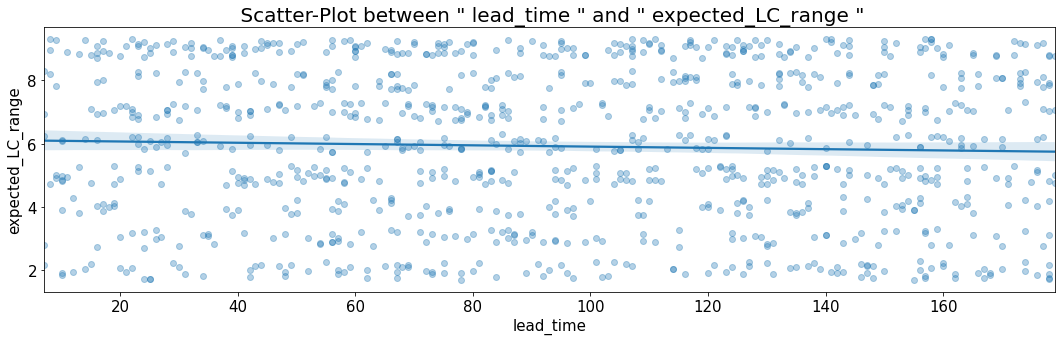

Enter your lead_time start limit 0
Enter your lead_time end limit 20
Enter your expected_LC_range start limit 8
Enter your expected_LC_range end limit 8
Your output here :
             PN supplier  lead_time  expected_LC_range
202631  352370        C          7                  8
285324  338810        J         16                  8
537909  318916        E          9                  8
741673  358253        C         17                  8
917260  310601        D          8                  8 


In [441]:
bivariates_1 (df1,['lead_time','expected_LC_range'],mand)

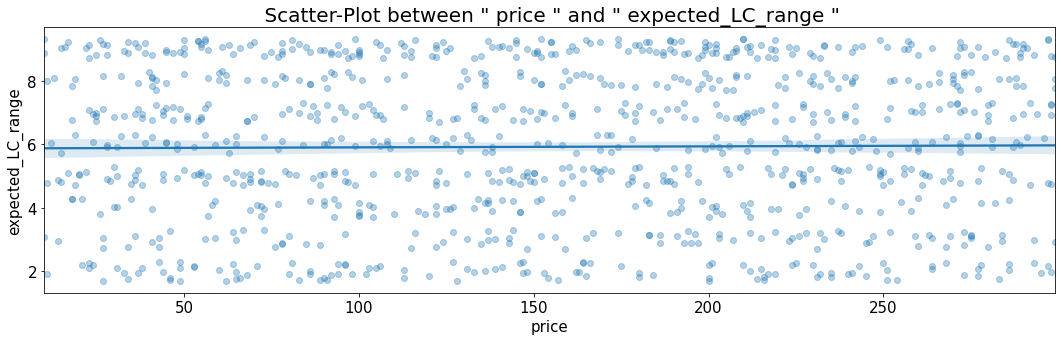

Enter your price start limit 0
Enter your price end limit 20
Enter your expected_LC_range start limit 9
Enter your expected_LC_range end limit 9
Your output here :
             PN supplier  price  expected_LC_range
77844   320979        F     17                  9
202236  349197        D     10                  9
455837  355529        F     15                  9
612809  395882        G     16                  9
742306  365490        H     10                  9 


In [442]:
bivariates_1 (df1,['price','expected_LC_range'],mand)

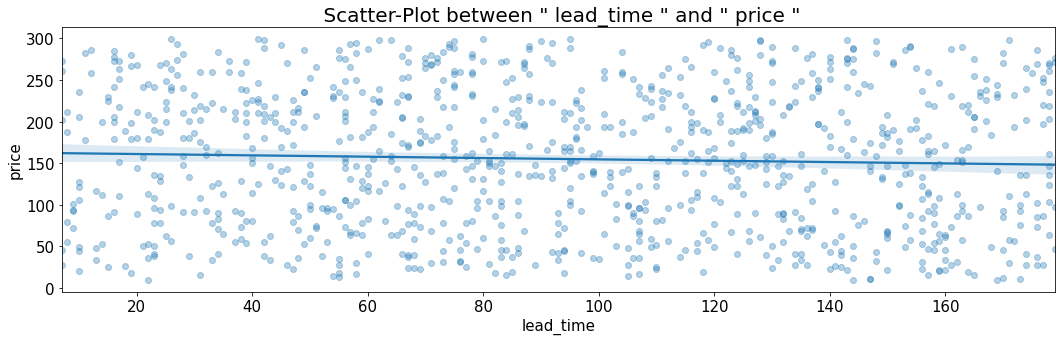

Enter your lead_time start limit 0
Enter your lead_time end limit 20
Enter your price start limit 0
Enter your price end limit 20
Your output here :
             PN supplier  lead_time  price
205496  376594        E         19     18
455175  347322        A         10     20 


In [443]:
bivariates_1 (df1,['lead_time','price'],mand)

# Multivariates

### Please, specify required Tri-Relations to be analyzed.
> ['life_cycle','lead_time','supplier']             -- "cat-cat-quan" 

> ['life_cycle','price','supplier']                 -- "cat-cat-quan"

> ['life_cycle','lead_time','expected_LC_range']    -- "cat-quan-quan"

> ['life_cycle','price','expected_LC_range']        -- "cat-quan-quan"

> ['price','lead_time','expected_LC_range']         -- "quan-quan-quan"



 Question: Here is a heatmap between three variables, may you check and just specify best portion that obey your need? 



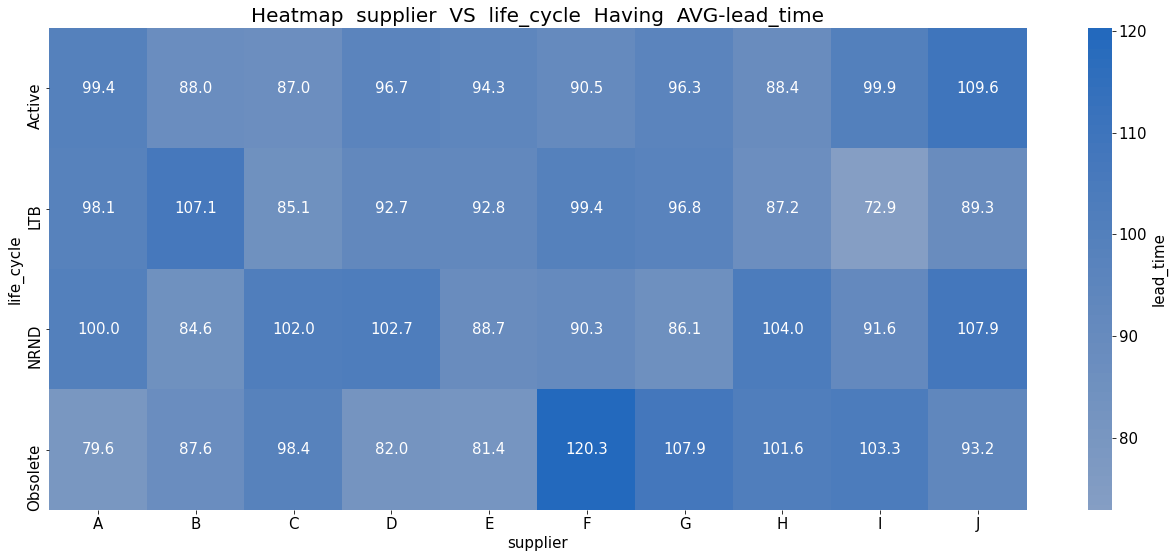

In [444]:
multivariates (df1,['life_cycle','lead_time','supplier'])

In [445]:
heat_interact (df1,'lead_time')

Enter supplier name please,I
Enter LC status please,NRND
Observation: here are your parts of interest : 
 
        supplier      PN life_cycle  lead_time
388780        I  365680       NRND         73
80844         I  345533       NRND        123
80555         I  343285       NRND          9
199748        I  329051       NRND        165
387609        I  346737       NRND         39
78232         I  324067       NRND        158 
 
 ------------------------



 Question: Here is a heatmap between three variables, may you check and just specify best portion that obey your need? 



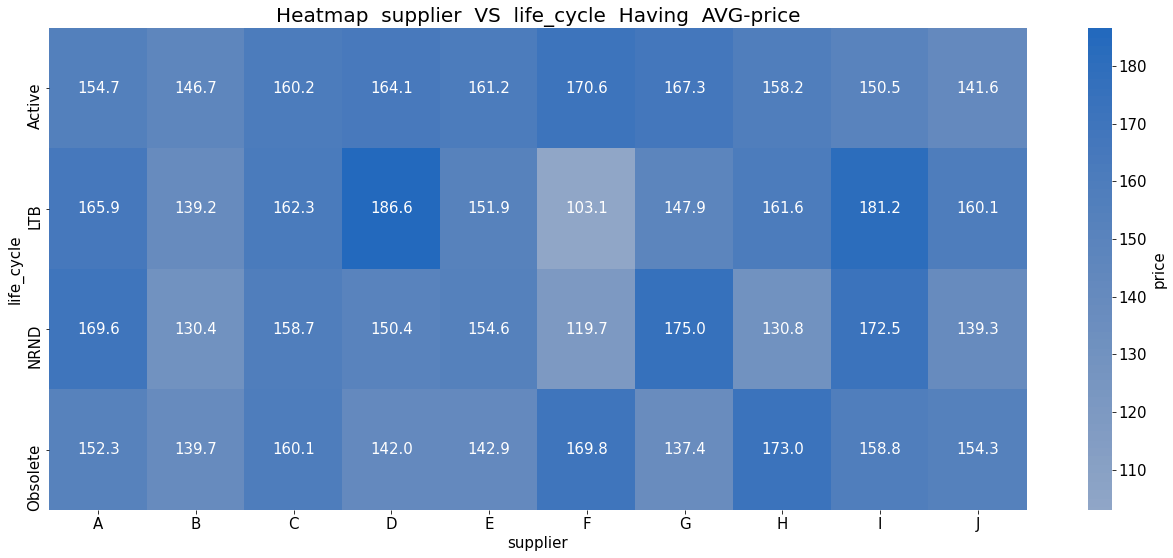

In [446]:
multivariates (df1,['life_cycle','price','supplier'])

In [447]:
heat_interact (df1,'price')

Enter supplier name please,J
Enter LC status please,Active
Observation: here are your parts of interest : 
 
        supplier      PN life_cycle  price
828386        J  315853     Active     68
903176        J  390581     Active    251
827269        J  303904     Active    189
828302        J  314930     Active    227
740684        J  347444     Active     14
742859        J  371838     Active    143 
 
 ------------------------



 Question: Here is a heatmap between three quantitative variables, may you check and just specify best portion that obey your need? 



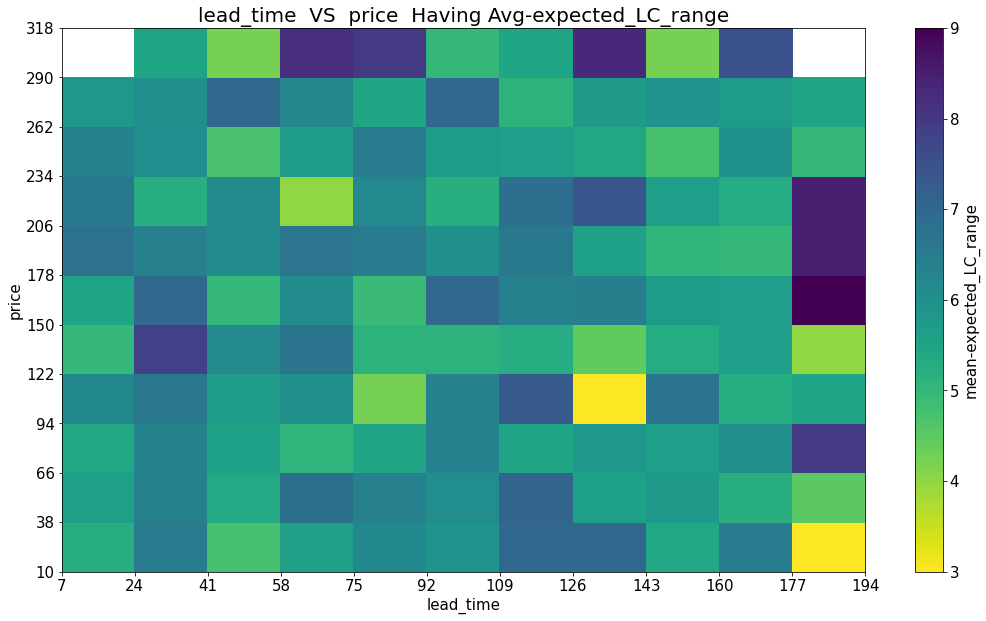

In [448]:
multivariates (df1,['lead_time','expected_LC_range','price'])

In [449]:
multi_heat_props(df,'lead_time','price')

Enter expected_LC_range value please,7
Enter lead_time start please,24
Enter lead_time end please,41
Enter first price limit please,122
Enter final price limit please,150
Observation: here are your parts of interest : 
 
        supplier      PN  lead_time  price  expected_LC_range
2462          I  209716         29    136                  7
2755          E  232545         33    124                  7
2828          G  237961         34    125                  7
4326          B  360369         25    126                  7
4701          G  390500         28    142                  7
...         ...     ...        ...    ...                ...
987155        D  714549         35    132                  7
989346        G  762917         37    127                  7
991639        G  814265         36    127                  7
996173        A  915031         25    139                  7
998485        F  965454         36    133                  7

[1036 rows x 5 columns] 
 
 -----------------

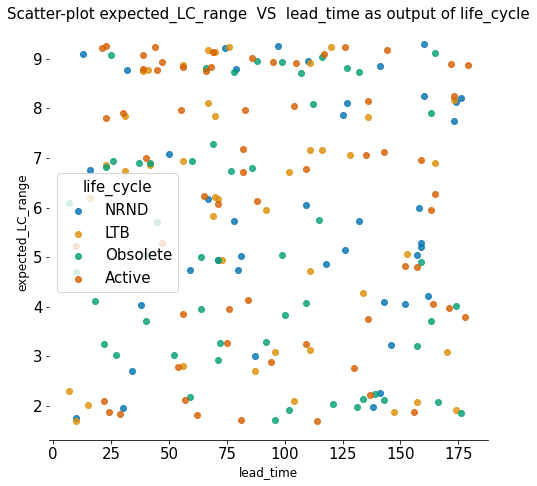

In [450]:
multivariates (df1,['life_cycle','lead_time','expected_LC_range'])

In [451]:
multi_scat_props(df,'lead_time')

Enter prefered life_cycle status please,0
Enter expected_LC_range start value please,25
Enter expected_LC_range end value please,8
Enter lead_time start please,9
Enter lead_time end please,0
Observation: here are your parts of interest : 
 
 Empty DataFrame
Columns: [supplier, PN, lead_time, life_cycle, expected_LC_range]
Index: [] 
 
 ------------------------


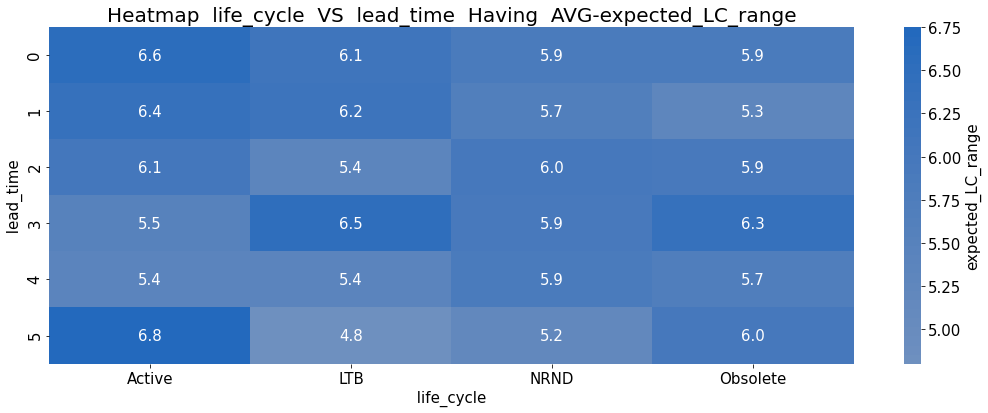

In [452]:
rcParams['figure.figsize'] = 15,6
cat_quan_quan_multi (df1,'life_cycle','lead_time','expected_LC_range')

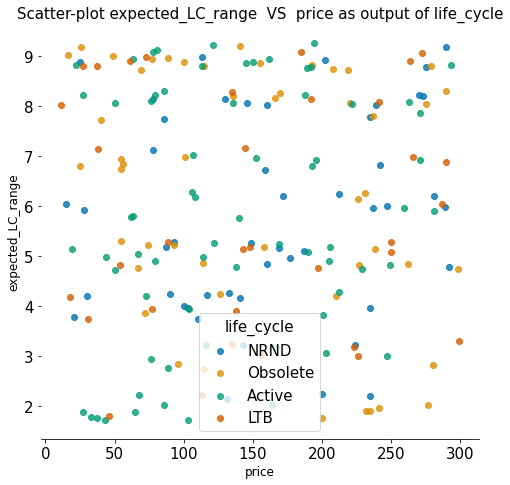

In [453]:
multivariates (df1,['life_cycle','price','expected_LC_range'])

In [461]:
multi_scat_props(df,'price')

Enter prefered life_cycle status please,Active
Enter expected_LC_range start value please,8
Enter expected_LC_range end value please,9
Enter price start please,0
Enter price end please,20
Observation: here are your parts of interest : 
 
        supplier      PN  price life_cycle  expected_LC_range
29948         C    6387     12     Active                  9
30001         F   12178     19     Active                  9
30101         B   22825     19     Active                  8
30221         B   36052     11     Active                  9
30266         G   39968     18     Active                  8
...         ...     ...    ...        ...                ...
999715        G  993476     14     Active                  8
999828        H  995872     10     Active                  9
999932        B  998251     16     Active                  9
999949        D  998631     18     Active                  8
999954        B  998735     13     Active                  9

[3442 rows x 5 columns] 
 
 

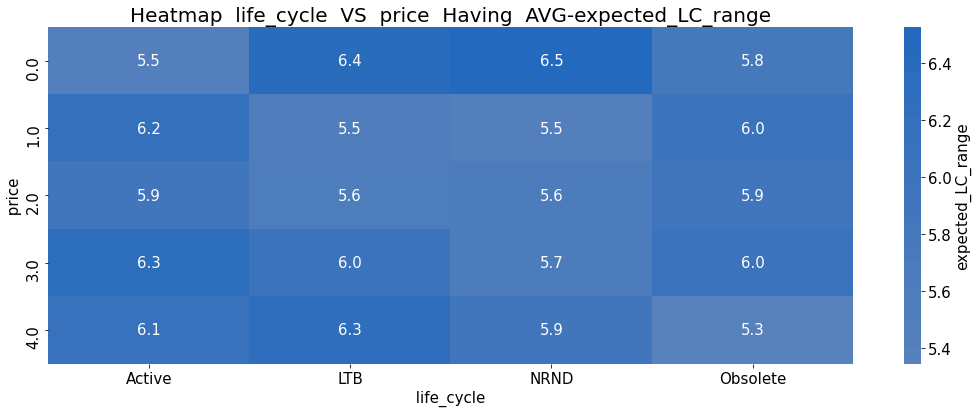

In [462]:
cat_quan_quan_multi (df1,'life_cycle','price','expected_LC_range')

##### Analyzing overall filtered data

In [463]:
#Main Function
mand={'1':{'Taxonomy':'power supply','current':14,'size':80,'packaging':'reel & tape'},
      '2':{'Taxonomy':'capacitor','voltage':34,'size':15},
      '3':{'Taxonomy':'resistor','resistance':38,'RoHs':'RoHs'},
      '4':{'Taxonomy':'resistor','resistance':15,'RoHs':'RoHs'},
      '5':{'Taxonomy':'semiconductor','voltage':15,'size':42},
      '6':{'Taxonomy':'semiconductor','voltage':28,'current':14,'size': 66},
      '7':{'Taxonomy':'capacitor','voltage':55,'size':66,'RoHs':'RoHs'},
      '8':{'Taxonomy':'capacitor','voltage':35,'size':72,'packaging':'reel & tape'},
      '9':{'Taxonomy':'capacitor','current':15,'size':42,'RoHs':'RoHs'},
      '10':{'Taxonomy':'resisitor','resistance':36,'current':11,'RoHs':'RoHs'},
      '11':{'Taxonomy':'resisitor','resistance':86,'current':13,'RoHs':'RoHs'},
      '12':{'Taxonomy':'semiconductor','resistance':36,'current':11,'packaging':'reel & tape'},
      '13':{'Taxonomy':'semiconductor','voltage':15,'size':42},
      '14':{'Taxonomy':'semiconductor','voltage':41,'size':30,'packaging':'reel & tape'},
      '15':{'Taxonomy':'power supply','voltage':15,'size':42}}
      
interest=['supplier','price','expected_LC_range','lead_time']


In [464]:
dff,best=concat_best (df,mand)

Output-Remark:Outputted Data-Frame has only 3 rows, Thus, to analyze their families data, PLs or suppliers, Please, Reserve data analysis ticket
Output-Remark:Outputted Data-Frame has only 8 rows, Thus, to analyze their families data, PLs or suppliers, Please, Reserve data analysis ticket
Your-Output: (499, 30) 
Your-Output: (504, 30) 
Your-Output: (11, 30) 
OOPs:No data based on your search criteria, Please respecify filters ranges
Output-Remark:Outputted Data-Frame has only 5 rows, Thus, to analyze their families data, PLs or suppliers, Please, Reserve data analysis ticket
Output-Remark:Outputted Data-Frame has only 5 rows, Thus, to analyze their families data, PLs or suppliers, Please, Reserve data analysis ticket
Output-Remark:Outputted Data-Frame has only 7 rows, Thus, to analyze their families data, PLs or suppliers, Please, Reserve data analysis ticket
OOPs:No data based on your search criteria, Please respecify filters ranges
OOPs:No data based on your search criteria, Please r

In [465]:
print(prin('31;1;4') + 'overall dataframe shape \n' + prin(0) + ' {} (rows,cols) '.format(dff.shape))
bests=''
for x in best:
    bests=bests + "{} \n".format(best[x])
print(prin('31;1;4') + '\n Reminder: Best numeric results: \n' + prin(0) + ' {} \n \n'.format(bests))


overall dataframe shape 
 (1071, 31) (rows,cols) 

 Reminder: Best numeric results: 
 {'price': 79, 'expected_LC_range': 7, 'lead_time': 28} 
{'price': 17, 'expected_LC_range': 9, 'lead_time': 7} 
{'price': 10, 'expected_LC_range': 9, 'lead_time': 7} 
{'price': 10, 'expected_LC_range': 9, 'lead_time': 7} 
{'price': 18, 'expected_LC_range': 9, 'lead_time': 9} 
{'price': nan, 'expected_LC_range': nan, 'lead_time': nan} 
{'price': 48, 'expected_LC_range': 7, 'lead_time': 85} 
{'price': 14, 'expected_LC_range': 9, 'lead_time': 20} 
{'price': 43, 'expected_LC_range': 9, 'lead_time': 52} 
{'price': nan, 'expected_LC_range': nan, 'lead_time': nan} 
{'price': nan, 'expected_LC_range': nan, 'lead_time': nan} 
{'price': 39, 'expected_LC_range': 5, 'lead_time': 95} 
{'price': 18, 'expected_LC_range': 9, 'lead_time': 9} 
{'price': 10, 'expected_LC_range': 8, 'lead_time': 19} 
{'price': 13, 'expected_LC_range': 9, 'lead_time': 27} 
 
 



In [466]:
missed(dff)

Overall Observation:
For all your search scenarios, you have " 8 " option within each of " 3 " suppliers, which can help for better pargain, 
   to know, what are these suppliers, How far each from best option within each feature of interest, Which supplier guarantees better options for all your features of interest and more, like probability of change to assure higher design sustainability or supplier that usually offers higher price deduction and more , 
 
 please, reserve data analysis ticket


In [ ]:
!jupyter nbconvert Slide.ipynb --to slides --post serve --no-input --no-prompt